# LP Solvers

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## SciPy Solver

[SciPy](https://scipy.org) is a library of Python packages for scientific computing. The subackage `scipy.optimize` includes the function `linprog` to compute solutions of linear optimization problems. See the [SciPy tutorial on optimization](https://docs.scipy.org/doc/scipy/tutorial/optimize.html).

In [20]:
from scipy.optimize import linprog

Note that the function `linprog` assumes the objective function is to be **minimized** therefore we should enter our objective functions as $-\mathbf{c}$.

Compute the solutions of the examples above.

In [21]:
A = np.array([[0,2,3],[1,1,2],[1,2,3]])
b = np.array([5,4,7])
c = np.array([2,3,4])

In [22]:
result = linprog(-c,A_ub=A,b_ub=b)

In [23]:
type(result)

scipy.optimize._optimize.OptimizeResult

In [24]:
result.x

array([1.5, 2.5, 0. ])

In [25]:
result

        message: Optimization terminated successfully. (HiGHS Status 7: Optimal)
        success: True
         status: 0
            fun: -10.5
              x: [ 1.500e+00  2.500e+00  0.000e+00]
            nit: 3
          lower:  residual: [ 1.500e+00  2.500e+00  0.000e+00]
                 marginals: [ 0.000e+00  0.000e+00  1.500e+00]
          upper:  residual: [       inf        inf        inf]
                 marginals: [ 0.000e+00  0.000e+00  0.000e+00]
          eqlin:  residual: []
                 marginals: []
        ineqlin:  residual: [ 0.000e+00  0.000e+00  5.000e-01]
                 marginals: [-5.000e-01 -2.000e+00 -0.000e+00]
 mip_node_count: 0
 mip_dual_bound: 0.0
        mip_gap: 0.0

In [27]:
A = np.array([[-1,-1,-1],[2,-1,1]])
b = np.array([-2,1])
c = np.array([2,-6,0])
result = linprog(-c,A_ub=A,b_ub=b)
result

        message: Optimization terminated successfully. (HiGHS Status 7: Optimal)
        success: True
         status: 0
            fun: 3.0
              x: [ 0.000e+00  5.000e-01  1.500e+00]
            nit: 3
          lower:  residual: [ 0.000e+00  5.000e-01  1.500e+00]
                 marginals: [ 1.000e+00  0.000e+00  0.000e+00]
          upper:  residual: [       inf        inf        inf]
                 marginals: [ 0.000e+00  0.000e+00  0.000e+00]
          eqlin:  residual: []
                 marginals: []
        ineqlin:  residual: [ 0.000e+00  0.000e+00]
                 marginals: [-3.000e+00 -3.000e+00]
 mip_node_count: 0
 mip_dual_bound: 0.0
        mip_gap: 0.0

## Optimal Transport

There are $n$ supply nodes and $m$ demand nodes. The cost to transport from supply node $i$ to demand node $j$ is proportional to the distance. The supply available at node $i$ is $s_i$. The supply transported to node $j$ is $d_j$. The total supply is equal to the total demand.

Let $x_{ij}$ be the supply delivered from node $i$ to node $j$.

Objective function is $\sum_{i,j} c_{ij} x_{ij}$ where $c_{ij}$ is the distance from supply node $i$ to demand node $j$.

Demand constraints:

$$
\sum_{i} x_{ij} = d_j , j=0,\dots,m-1
$$

Supply constraints:

$$
\sum_{j} x_{ij} = s_i , i=0,\dots,n-1
$$

**Question.** What is the matrix $A$ and vector $\mathbf{b}$ for this problem in standard form?

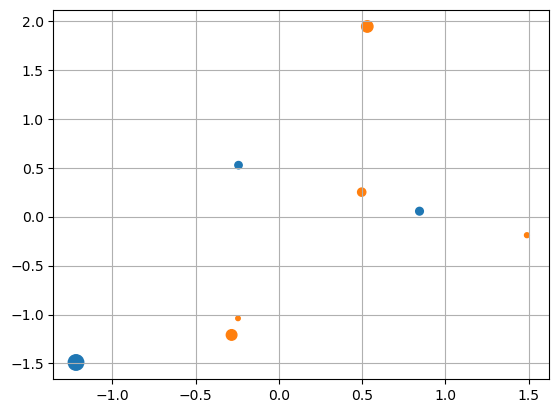

In [31]:
n = 3
m = 5
supply_nodes = np.random.randn(2,n)
supply = np.random.rand(n)
plt.scatter(supply_nodes[0,:],supply_nodes[1,:],s=200*supply)
demand_nodes = np.random.randn(2,m)
demand = np.random.rand(m)
demand = demand/np.sum(demand)*np.sum(supply)
plt.scatter(demand_nodes[0,:],demand_nodes[1,:],s=200*demand)
plt.grid(True)
plt.show()